In [1]:
1+1

2

In [6]:
!pip install pandas-datareader


  Obtaining dependency information for pandas-datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data

In [13]:
!pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/05/28664524fcc67c078313d482bf25fe403e9399130622cfc89e185ec0abf6/yfinance-0.2.54-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.0 MB 5.8 MB/s eta 0:00:01
     ---- ----------------------------------- 0.4/3.0 MB 4.5 MB/s eta 0:00:01
     ------ --------------------------------- 0.5/3.0 MB 4.0 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/3.0 MB 3

In [28]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440329  6.455075  6.391277  6.422875  493729600
2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000
2010-01-07  6.337109  6.379842  6.291066  6.372319  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800


In [29]:
print(df.columns)


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


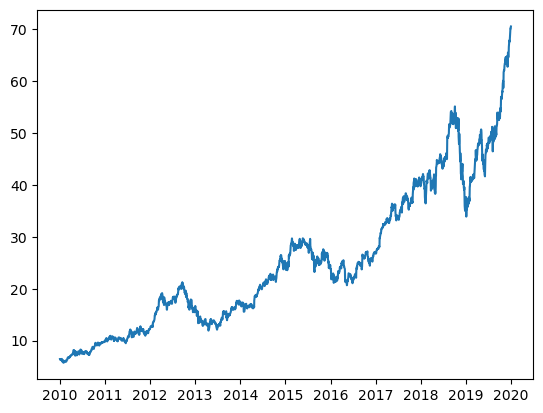

In [30]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,57.212838
2019-12-24,57.410470
2019-12-26,57.647437


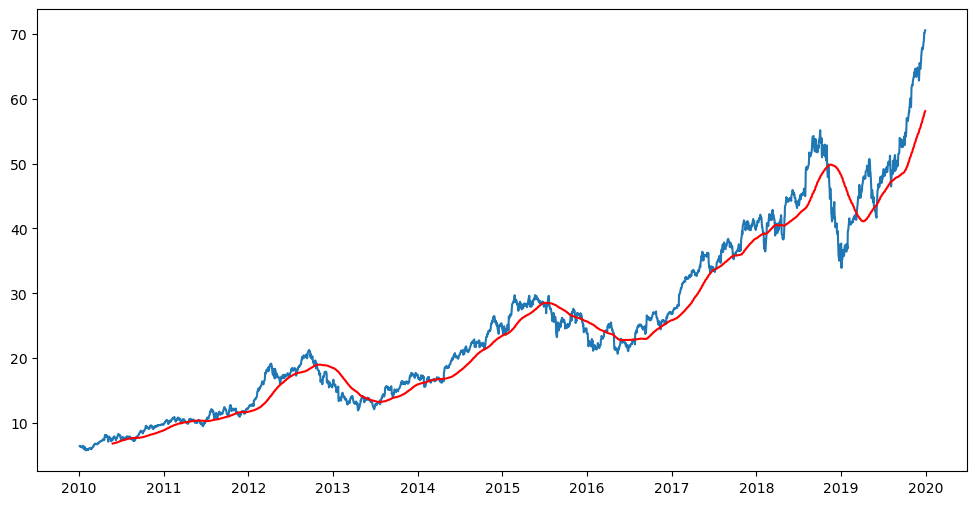

In [33]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [34]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,52.164465
2019-12-24,52.291901
2019-12-26,52.425206


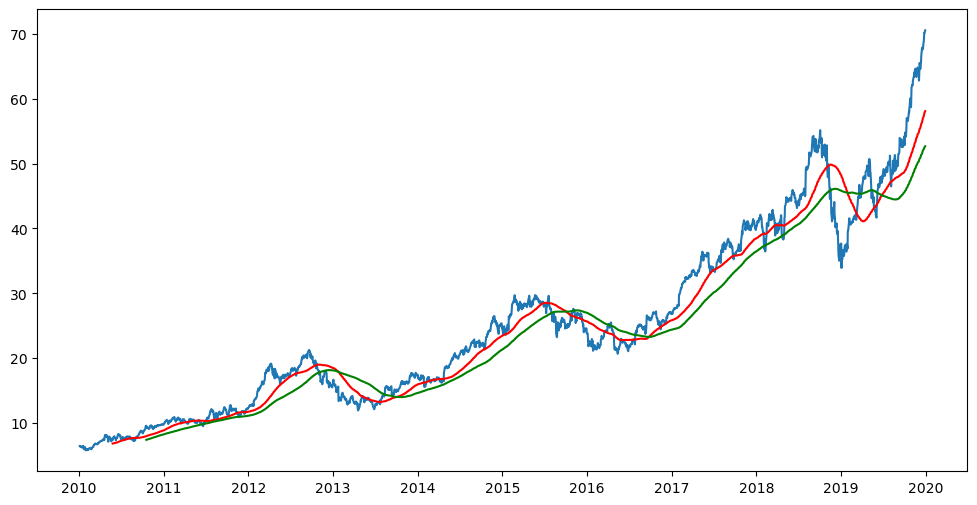

In [36]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [39]:
### splitting data into training and testing ###

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [41]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.02759996],
       [0.02806509],
       [0.02377929],
       ...,
       [0.88408395],
       [0.89123149],
       [0.88640242]])

In [43]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [6]:
import tensorflow as tf

In [3]:
!pip install keras

In [9]:
from tensorflow.keras.layers import Dense,Dropout,LSTM


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject